In [1]:
!conda install -c conda-forge imbalanced-learn -y
!pip install -U imbalanced-learn

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done


In [2]:
!pip install keras

In [3]:
!pip install tensorflow

In [4]:
!tf_upgrade_v2


2022-10-31 09:30:06.479006: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
usage: tf_upgrade_v2 [-h] [--infile INPUT_FILE] [--outfile OUTPUT_FILE]
                     [--intree INPUT_TREE] [--outtree OUTPUT_TREE]
                     [--copyotherfiles COPY_OTHER_FILES] [--inplace]
                     [--no_import_rename] [--no_upgrade_compat_v1_import]
                     [--reportfile REPORT_FILENAME] [--mode {DEFAULT,SAFETY}]
                     [--print_all]

Convert a TensorFlow Python file from 1.x to 2.0

Simple usage:
  tf_upgrade_v2.py --infile foo.py --outfile bar.py
  tf_upgrade_v2.py --infile foo.ipynb --outfile bar.ipynb
  tf_upgrade_v2.py --intree ~/code/old --outtree ~/code/new

optional arguments:
  -h, -

In [407]:
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import preprocessing
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Embedding, Masking
from sklearn.metrics import balanced_accuracy_score
import os
import joblib
sn.set(color_codes=True)
from numpy.random import seed
import tensorflow as tf
tf.compat.v1.logging
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

In [408]:
df_1 = pd.read_excel('Thesis_range_month3.xlsx', sheet_name='Sheet1')
df_1

,TimeStamp,.KNG-P-PL1-PRO-PEE-110-020-E001-ALARM,.KNG-P-PL1-PRO-PEE-110-020-E001-GEM,.KNG-P-PL1-PRO-PEE-110-020-E001-PV,.KNG-P-PL1-ODB-LINERATE-MOM-PV
0,2021-07-07 11:51:00,0.0,29.993824,17.896122,19.594288
1,2021-07-07 11:51:30,0.0,22.609907,31.674854,19.594288
2,2021-07-07 11:52:00,0.0,26.933184,20.201208,19.594288
3,2021-07-07 11:52:30,0.0,28.904484,39.827011,19.594288
4,2021-07-07 11:53:00,0.0,30.583208,25.773729,19.594288
...,...,...,...,...,...
43993,2021-07-22 18:27:30,0.0,40.779015,22.188253,25.094891
43994,2021-07-22 18:28:00,0.0,33.400105,51.556278,25.094891
43995,2021-07-22 18:28:30,0.0,42.297951,29.595091,25.094891
43996,2021-07-22 18:29:00,0.0,37.999458,54.815380,24.981730


In [409]:
df_1=df_1.rename(columns = {".KNG-P-PL1-PRO-PEE-110-020-E001-ALARM": "alarm", 
                       ".KNG-P-PL1-PRO-PEE-110-020-E001-GEM": "avg_el_usage",
                      ".KNG-P-PL1-PRO-PEE-110-020-E001-PV":"ex_el_usage",
                      ".KNG-P-PL1-ODB-LINERATE-MOM-PV":"line_rate"}) 

In [410]:
df_1["TimeStamp"] = pd.to_datetime(df_1["TimeStamp"])
df_1['TimeStamp']

0       2021-07-07 11:51:00
1       2021-07-07 11:51:30
2       2021-07-07 11:52:00
3       2021-07-07 11:52:30
4       2021-07-07 11:53:00
                ...        
43993   2021-07-22 18:27:30
43994   2021-07-22 18:28:00
43995   2021-07-22 18:28:30
43996   2021-07-22 18:29:00
43997   2021-07-22 18:29:30
Name: TimeStamp, Length: 43998, dtype: datetime64[ns]

## Exploratory Data Analsys

In [411]:
print(df_1.isnull().values.any())
print('----')
print(df_1.describe())

False
----
              alarm  avg_el_usage   ex_el_usage     line_rate
count  43998.000000  43998.000000  43998.000000  43998.000000
mean       0.019630     32.199339     32.194336     26.095328
std        0.118313     11.277856     14.213025      7.823686
min        0.000000      0.000000      0.000000      0.000000
25%        0.000000     28.361170     23.702448     27.076160
50%        0.000000     32.205420     31.551091     28.011532
75%        0.000000     36.550130     40.115862     29.527574
max        1.000000    101.848160    127.000000     38.738033


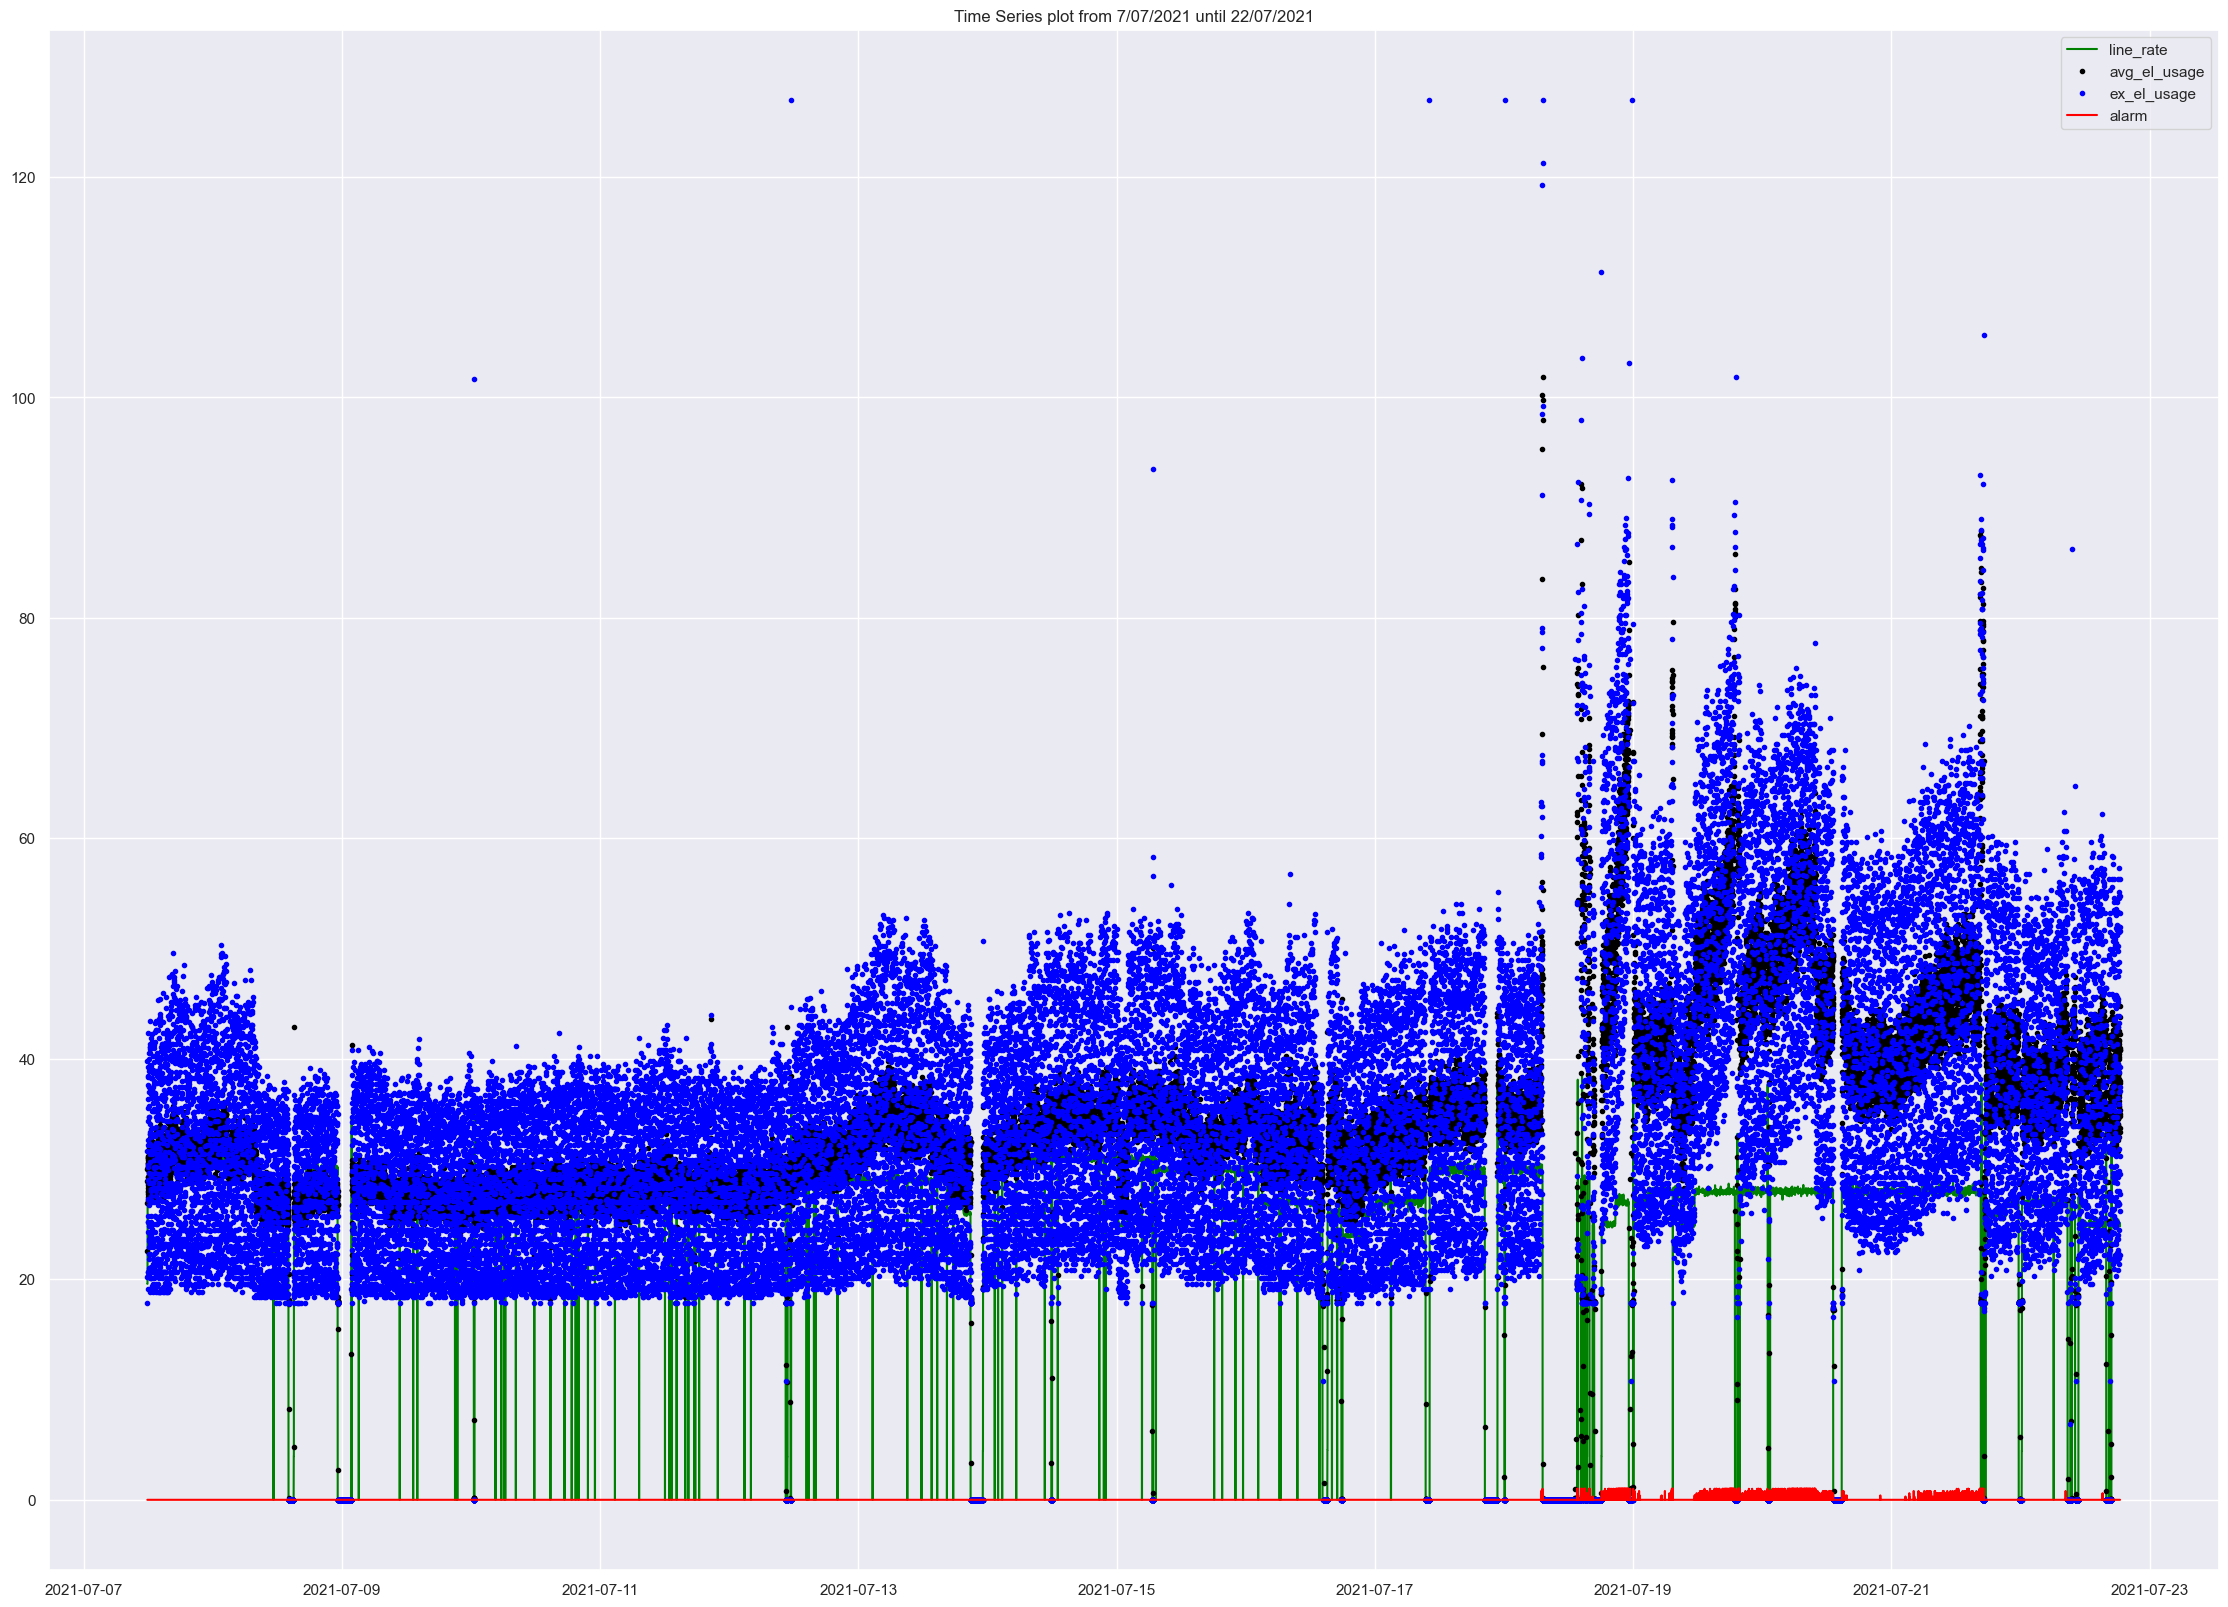

In [412]:
# plot time series

plt.figure(figsize=(28,20))
plt.plot(df_1["TimeStamp"],df_1["line_rate"],'-', color='green', label='line_rate')
plt.plot(df_1["TimeStamp"],df_1['avg_el_usage'],'.', color='black', label='avg_el_usage')
plt.plot(df_1["TimeStamp"],df_1['ex_el_usage'],'.', color='blue',label='ex_el_usage')
plt.plot(df_1["TimeStamp"],df_1['alarm'],'-', color='red', label='alarm')
plt.title("Time Series plot from 7/07/2021 until 22/07/2021")
plt.legend()
plt.savefig('test.png', bbox_inches='tight')
plt.show()

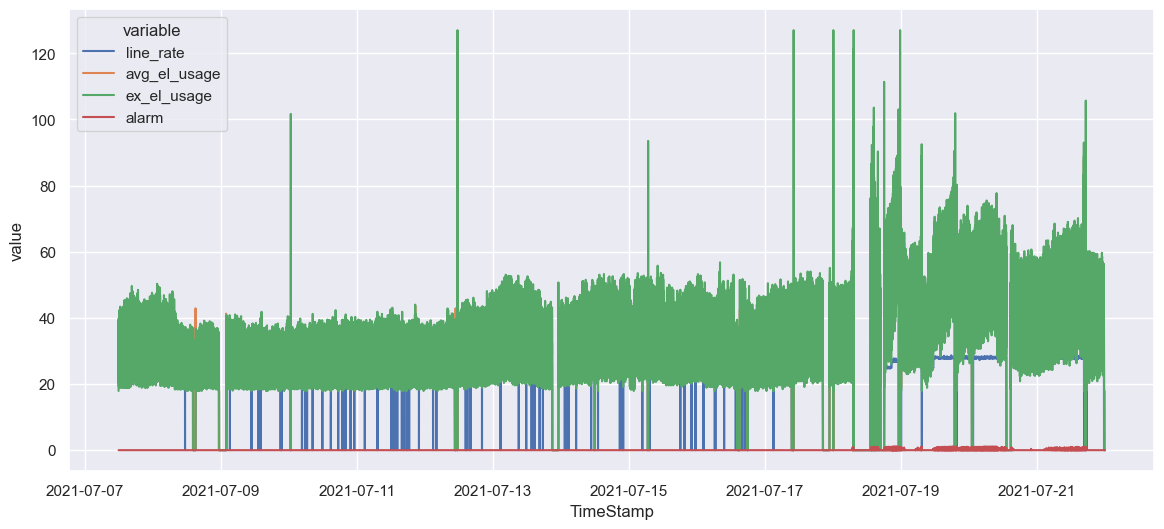

In [413]:
start_date = "2021-07-07"
end_date   = "2021-07-22"

#melt dataframe into long format for seaborn to plot
df_long_temp = df_1.melt(id_vars=["TimeStamp"], value_vars=["line_rate", "avg_el_usage", "ex_el_usage", "alarm"])

long_mask_temp = (df_long_temp["TimeStamp"] >= start_date) & (df_long_temp["TimeStamp"] < end_date)
plt.figure(figsize=(14, 6))
g = sn.lineplot(data=df_long_temp.loc[long_mask_temp], x="TimeStamp", y="value", hue="variable")

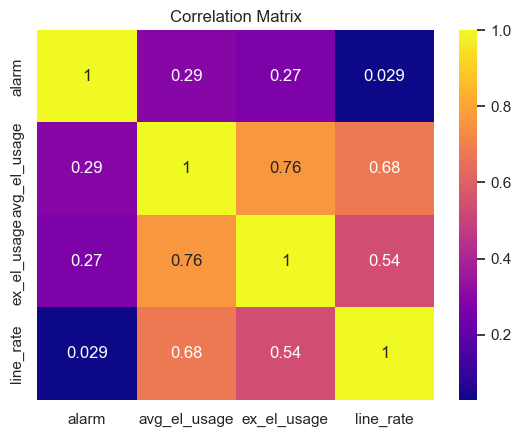

In [414]:
# plot correlation matrix

corrMatrix = df_1.corr()
sn.heatmap(corrMatrix, annot=True, cmap=plt.get_cmap('plasma'))
plt.title("Correlation Matrix")
plt.savefig('corr.png', bbox_inches='tight')
plt.show()

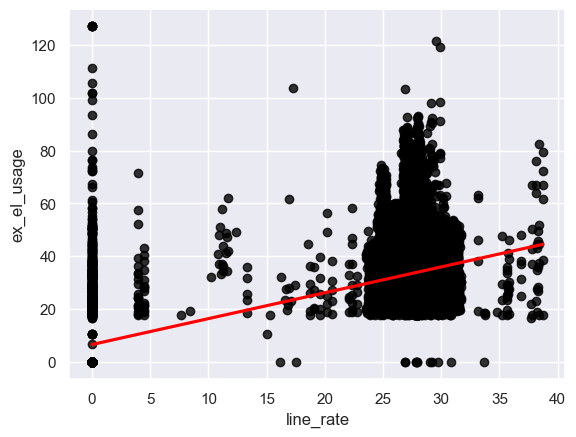

In [415]:
# plot linear regression plots between Line Rate and AVG / Exact electricity usage
ax = sn.regplot(x="line_rate", y="ex_el_usage", data=df_1,
                 scatter_kws={"color": "black"}, line_kws={"color": "red"})

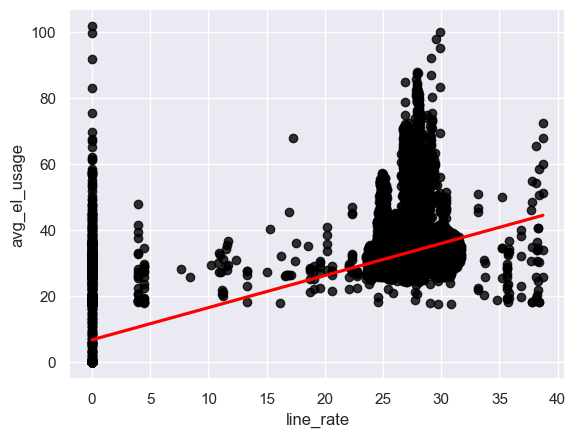

In [416]:
ax1 = sn.regplot(x="line_rate", y="avg_el_usage", data=df_1,
                 scatter_kws={"color": "black"}, line_kws={"color": "red"})

In [417]:
# Feature engineering 
df_1['alarm']=df_1['alarm'].astype(int)
alarm_bool=df_1[df_1.columns[1]].astype(bool)
df_1['alarm'] = alarm_bool

df_1

,TimeStamp,alarm,avg_el_usage,ex_el_usage,line_rate
0,2021-07-07 11:51:00,False,29.993824,17.896122,19.594288
1,2021-07-07 11:51:30,False,22.609907,31.674854,19.594288
2,2021-07-07 11:52:00,False,26.933184,20.201208,19.594288
3,2021-07-07 11:52:30,False,28.904484,39.827011,19.594288
4,2021-07-07 11:53:00,False,30.583208,25.773729,19.594288
...,...,...,...,...,...
43993,2021-07-22 18:27:30,False,40.779015,22.188253,25.094891
43994,2021-07-22 18:28:00,False,33.400105,51.556278,25.094891
43995,2021-07-22 18:28:30,False,42.297951,29.595091,25.094891
43996,2021-07-22 18:29:00,False,37.999458,54.815380,24.981730


In [418]:
# Apply Rolling Mean Filter

df_1['line_rate_ma'] = df_1['line_rate'].rolling(15, min_periods=1).mean()
df_1

,TimeStamp,alarm,avg_el_usage,ex_el_usage,line_rate,line_rate_ma
0,2021-07-07 11:51:00,False,29.993824,17.896122,19.594288,19.594288
1,2021-07-07 11:51:30,False,22.609907,31.674854,19.594288,19.594288
2,2021-07-07 11:52:00,False,26.933184,20.201208,19.594288,19.594288
3,2021-07-07 11:52:30,False,28.904484,39.827011,19.594288,19.594288
4,2021-07-07 11:53:00,False,30.583208,25.773729,19.594288,19.594288
...,...,...,...,...,...,...
43993,2021-07-22 18:27:30,False,40.779015,22.188253,25.094891,24.982774
43994,2021-07-22 18:28:00,False,33.400105,51.556278,25.094891,25.000292
43995,2021-07-22 18:28:30,False,42.297951,29.595091,25.094891,25.000292
43996,2021-07-22 18:29:00,False,37.999458,54.815380,24.981730,24.992748


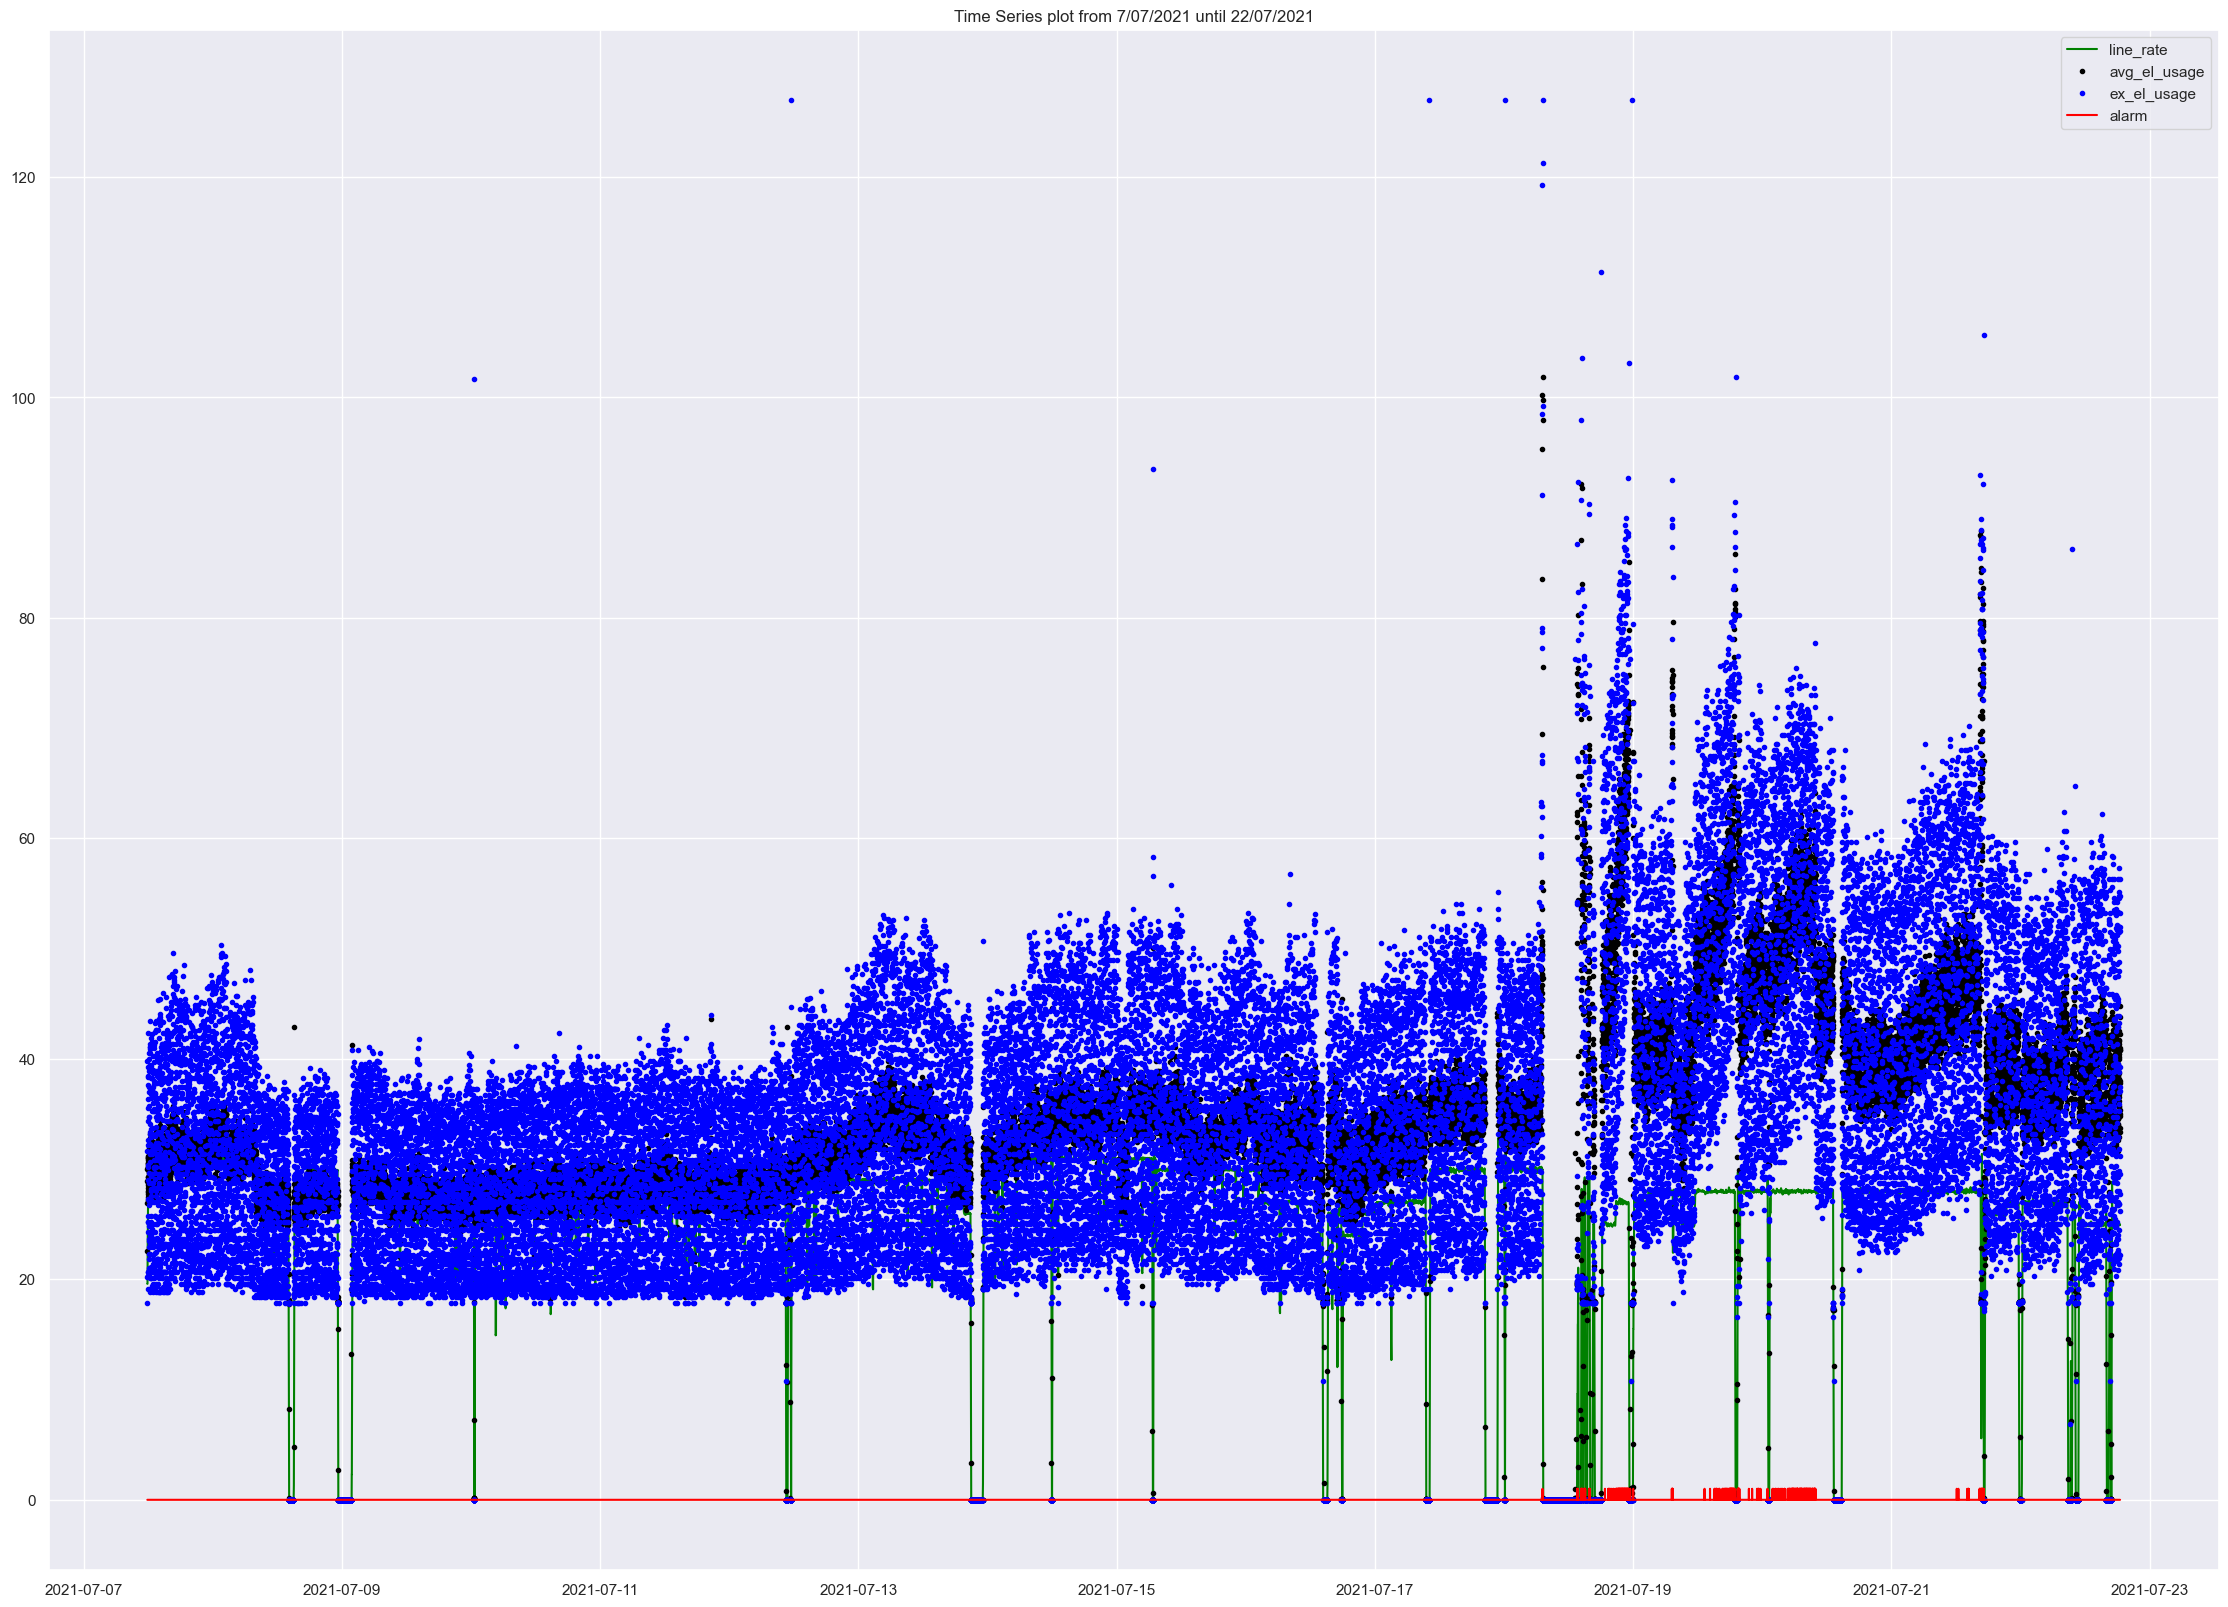

In [419]:
plt.figure(figsize=(28,20))
plt.plot(df_1["TimeStamp"],df_1["line_rate_ma"],'-', color='green', label='line_rate')
plt.plot(df_1["TimeStamp"],df_1['avg_el_usage'],'.', color='black', label='avg_el_usage')
plt.plot(df_1["TimeStamp"],df_1['ex_el_usage'],'.', color='blue',label='ex_el_usage')
plt.plot(df_1["TimeStamp"],df_1['alarm'],'-', color='red', label='alarm')
plt.title("Time Series plot from 7/07/2021 until 22/07/2021")
plt.legend()
plt.savefig('test.png', bbox_inches='tight')
plt.show()

In [420]:
df_1['status']='Working'

In [421]:
# Creation of the line rate status variable


def compute_status (row):
    if df_1.loc[df_1.index[row], "line_rate_ma"] == 0 and df_1.loc[df_1.index[row - 10], "avg_el_usage"] > 0:
        df_1.loc[df_1.index[row], "status"] = 'Failure'
    elif df_1.loc[df_1.index[row], "line_rate_ma"] == 0 and df_1.loc[df_1.index[row - 10], "avg_el_usage"] == 0:
        df_1.loc[df_1.index[row], "status"] = 'Shutdown' 
    else:
        df_1.loc[df_1.index[row], "status"] = 'Working'

for ind in range(10, len(df_1.index)):
    compute_status(ind)

In [422]:
df_1

,TimeStamp,alarm,avg_el_usage,ex_el_usage,line_rate,line_rate_ma,status
0,2021-07-07 11:51:00,False,29.993824,17.896122,19.594288,19.594288,Working
1,2021-07-07 11:51:30,False,22.609907,31.674854,19.594288,19.594288,Working
2,2021-07-07 11:52:00,False,26.933184,20.201208,19.594288,19.594288,Working
3,2021-07-07 11:52:30,False,28.904484,39.827011,19.594288,19.594288,Working
4,2021-07-07 11:53:00,False,30.583208,25.773729,19.594288,19.594288,Working
...,...,...,...,...,...,...,...
43993,2021-07-22 18:27:30,False,40.779015,22.188253,25.094891,24.982774,Working
43994,2021-07-22 18:28:00,False,33.400105,51.556278,25.094891,25.000292,Working
43995,2021-07-22 18:28:30,False,42.297951,29.595091,25.094891,25.000292,Working
43996,2021-07-22 18:29:00,False,37.999458,54.815380,24.981730,24.992748,Working


In [423]:
df_1.describe(include = "object")

,status
count,43998
unique,3
top,Working
freq,41224


In [424]:
# Creation of of the forward 30 minutes status of the line rate

df_1["status_30min"] = 'Unknown'

for ind in range(0, len(df_1.index) - 60):
    df_1.loc[df_1.index[ind], "status_30min"] = df_1.loc[df_1.index[ind + 60], "status"]

In [425]:
df_1

,TimeStamp,alarm,avg_el_usage,ex_el_usage,line_rate,line_rate_ma,status,status_30min
0,2021-07-07 11:51:00,False,29.993824,17.896122,19.594288,19.594288,Working,Working
1,2021-07-07 11:51:30,False,22.609907,31.674854,19.594288,19.594288,Working,Working
2,2021-07-07 11:52:00,False,26.933184,20.201208,19.594288,19.594288,Working,Working
3,2021-07-07 11:52:30,False,28.904484,39.827011,19.594288,19.594288,Working,Working
4,2021-07-07 11:53:00,False,30.583208,25.773729,19.594288,19.594288,Working,Working
...,...,...,...,...,...,...,...,...
43993,2021-07-22 18:27:30,False,40.779015,22.188253,25.094891,24.982774,Working,Unknown
43994,2021-07-22 18:28:00,False,33.400105,51.556278,25.094891,25.000292,Working,Unknown
43995,2021-07-22 18:28:30,False,42.297951,29.595091,25.094891,25.000292,Working,Unknown
43996,2021-07-22 18:29:00,False,37.999458,54.815380,24.981730,24.992748,Working,Unknown


In [426]:
df_1["status"].value_counts()

Working     41224
Shutdown     2514
Failure       260
Name: status, dtype: int64

In [427]:
# Creation of the Renaining Useful Life variable

#set default time to 1 row
df_1["rul"] = 1

#set time to failure to 0 for all rows where failure is true
df_1.loc[df_1["status"]=="Failure", "rul"] = 0

#loop backwards over rows if one row down and the row itself are not failure set time to the time one row down + 1
for row in range(len(df_1) -2, 0, -1):
    if not df_1.loc[row + 1, "rul"] == 0 and not df_1.loc[row, "rul"] == 0:
        df_1.loc[row, "rul"] = df_1.loc[row + 1, "rul"] + 1

df_1 = df_1.loc[1:,]
df_1["rul"] = df_1["rul"] / 0.5

df_1.head()

,TimeStamp,alarm,avg_el_usage,ex_el_usage,line_rate,line_rate_ma,status,status_30min,rul
1,2021-07-07 11:51:30,False,22.609907,31.674854,19.594288,19.594288,Working,Working,6320.0
2,2021-07-07 11:52:00,False,26.933184,20.201208,19.594288,19.594288,Working,Working,6318.0
3,2021-07-07 11:52:30,False,28.904484,39.827011,19.594288,19.594288,Working,Working,6316.0
4,2021-07-07 11:53:00,False,30.583208,25.773729,19.594288,19.594288,Working,Working,6314.0
5,2021-07-07 11:53:30,False,27.189575,27.254736,27.804878,20.962720,Working,Working,6312.0


In [428]:
# Creation of RUL time bins for classification

df_1["rul_bins"] = "unknown"

bin1_mask = df_1["rul"] < 30
df_1.loc[bin1_mask, "rul_bins"] = "30mins"

bin2_mask = (df_1["rul"] >= 30) & (df_1["rul"] < 60)
df_1.loc[bin2_mask, "rul_bins"] = "60mins"

bin2_mask = (df_1["rul"] >= 60) & (df_1["rul"] < 180)
df_1.loc[bin2_mask, "rul_bins"] = "3hours"

bin3_mask = (df_1["rul"] >= 180) & (df_1["rul"] < 720)
df_1.loc[bin3_mask, "rul_bins"] = "12hours"

bin4_mask = (df_1["rul"] >= 720) & (df_1["rul"] < 1440)
df_1.loc[bin4_mask, "rul_bins"] = "24hours"

bin5_mask = (df_1["rul"] >= 1440)
df_1.loc[bin5_mask, "rul_bins"] = "24hours+"

In [429]:
df_1.head()

,TimeStamp,alarm,avg_el_usage,ex_el_usage,line_rate,line_rate_ma,status,status_30min,rul,rul_bins
1,2021-07-07 11:51:30,False,22.609907,31.674854,19.594288,19.594288,Working,Working,6320.0,24hours+
2,2021-07-07 11:52:00,False,26.933184,20.201208,19.594288,19.594288,Working,Working,6318.0,24hours+
3,2021-07-07 11:52:30,False,28.904484,39.827011,19.594288,19.594288,Working,Working,6316.0,24hours+
4,2021-07-07 11:53:00,False,30.583208,25.773729,19.594288,19.594288,Working,Working,6314.0,24hours+
5,2021-07-07 11:53:30,False,27.189575,27.254736,27.804878,20.962720,Working,Working,6312.0,24hours+


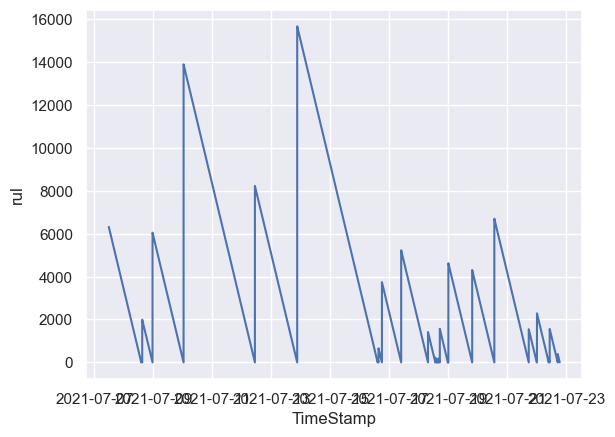

In [430]:
sn.lineplot(data=df_1, x="TimeStamp", y="rul")
plt.show()

## ML model baseline - Logistic Regression

In [431]:
#Encode labels

label_encoder = preprocessing.LabelEncoder()
df_1['status']= label_encoder.fit_transform(df_1['status'])
print(df_1.head())

            TimeStamp  alarm  avg_el_usage  ex_el_usage  line_rate  \
1 2021-07-07 11:51:30  False     22.609907    31.674854  19.594288   
2 2021-07-07 11:52:00  False     26.933184    20.201208  19.594288   
3 2021-07-07 11:52:30  False     28.904484    39.827011  19.594288   
4 2021-07-07 11:53:00  False     30.583208    25.773729  19.594288   
5 2021-07-07 11:53:30  False     27.189575    27.254736  27.804878   

   line_rate_ma  status status_30min     rul  rul_bins  
1     19.594288       2      Working  6320.0  24hours+  
2     19.594288       2      Working  6318.0  24hours+  
3     19.594288       2      Working  6316.0  24hours+  
4     19.594288       2      Working  6314.0  24hours+  
5     20.962720       2      Working  6312.0  24hours+  


In [432]:
df_1.drop(df_1[df_1['status_30min'] == 'Unknown'].index, inplace = True)
df_1

,TimeStamp,alarm,avg_el_usage,ex_el_usage,line_rate,line_rate_ma,status,status_30min,rul,rul_bins
1,2021-07-07 11:51:30,False,22.609907,31.674854,19.594288,19.594288,2,Working,6320.0,24hours+
2,2021-07-07 11:52:00,False,26.933184,20.201208,19.594288,19.594288,2,Working,6318.0,24hours+
3,2021-07-07 11:52:30,False,28.904484,39.827011,19.594288,19.594288,2,Working,6316.0,24hours+
4,2021-07-07 11:53:00,False,30.583208,25.773729,19.594288,19.594288,2,Working,6314.0,24hours+
5,2021-07-07 11:53:30,False,27.189575,27.254736,27.804878,20.962720,2,Working,6312.0,24hours+
...,...,...,...,...,...,...,...,...,...,...
43933,2021-07-22 17:57:30,False,40.991486,28.753546,24.963505,25.090081,2,Working,130.0,3hours
43934,2021-07-22 17:58:00,False,32.878632,42.906597,24.963505,25.093498,2,Working,128.0,3hours
43935,2021-07-22 17:58:30,False,41.421127,34.703617,24.963505,25.081680,2,Working,126.0,3hours
43936,2021-07-22 17:59:00,False,34.724987,31.242062,24.655739,25.049345,2,Working,124.0,3hours


In [433]:
print(df_1.isnull().values.any())

False


In [434]:
#Fitting logistic regression

X=df_1[['alarm'] + ['avg_el_usage'] + ['ex_el_usage'] + ['line_rate_ma'] + ['status']]
y=df_1['status_30min']

In [435]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [436]:
#Train-test split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42,stratify= y)

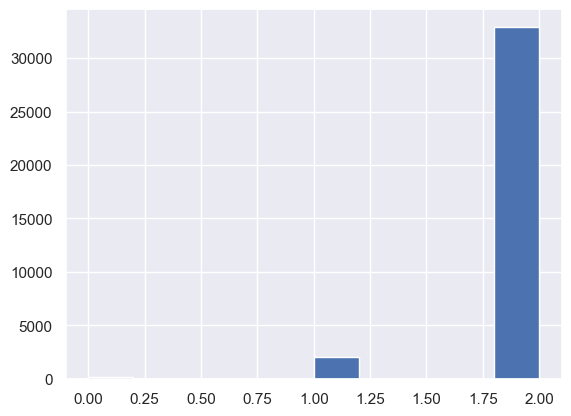

In [437]:
#Plot of imbalanced target variable
plt.hist(y_train)
plt.savefig('bal_hist.png', bbox_inches='tight')

In [438]:
#Application of the SMOTETomek for balancing
#SMOTE is an oversampling technique 
#and creates new minority class synthetic samples, and Tomek Links is an undersampling technique.

smt = SMOTETomek(random_state=42)
X_train_2, y_train_2 = smt.fit_resample(X_train, y_train)

(array([32722.,     0.,     0.,     0.,     0., 32309.,     0.,     0.,
            0., 32219.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

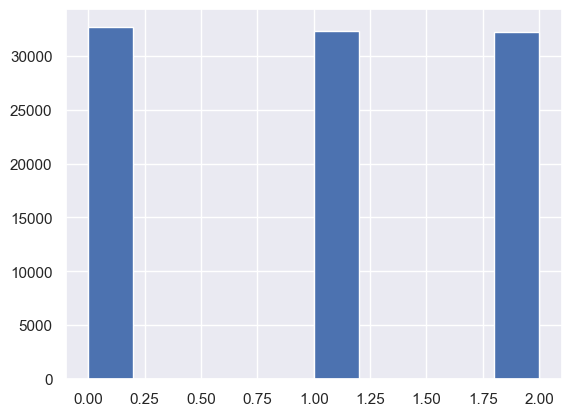

In [439]:
plt.hist(y_train_2)

In [440]:
clf = LogisticRegression()
# training the model
clf.fit(X_train_2, y_train_2)

LogisticRegression()

In [441]:
y_pred = clf.predict(X_test)

In [442]:
accuracy_logreg= accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy_logreg * 100))
recall_logreg = recall_score(y_test, y_pred, average='weighted')
print("Recall: {:.2f}%".format(recall_logreg * 100))
precision_logreg=precision_score(y_test,y_pred, average='weighted')
print("Precision: {:.2f}%".format(precision_logreg * 100))
f1_logreg=f1_score(y_test, y_pred, average='weighted')
print("F1-Score: {:.2f}%".format(f1_logreg * 100))

Accuracy: 84.02%
Recall: 84.02%
Precision: 95.00%
F1-Score: 89.01%


In [443]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.01      0.21      0.02        52
           1       0.55      0.68      0.61       503
           2       0.98      0.85      0.91      8233

    accuracy                           0.84      8788
   macro avg       0.51      0.58      0.51      8788
weighted avg       0.95      0.84      0.89      8788



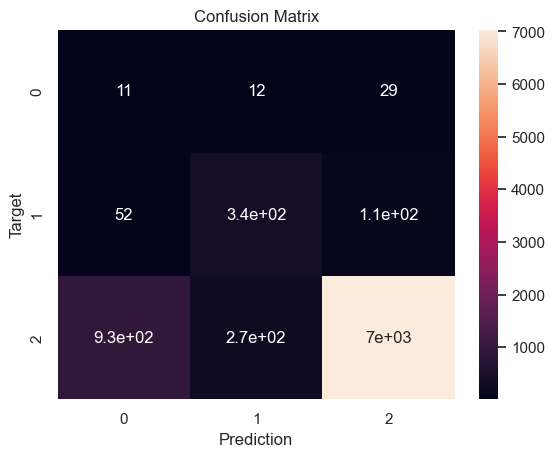

In [444]:
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sn.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')
plt.savefig('cf.png', bbox_inches='tight')
plt.show()

In [445]:
balanced_accuracy_score(y_test, y_pred)

0.5811981719452599

## ML modeling - Decision Tree

In [446]:
# Wrapper function for making computations on the recall score for failures


def recall_failure(y_true, y_pred):

    wanted_labels = [0]
    wanted_indices = np.where(y_true == 0)
    wanted_y_true = y_true[wanted_indices]
    wanted_y_pred = y_pred[wanted_indices]
    recall_ = recall_score(y_true=wanted_y_true, y_pred=wanted_y_pred, average=None)[0]

    return recall_

In [447]:
# GridSearch CV implementation


# tree's depth setting
recall_0_scorer = make_scorer(recall_failure)

pipe = Pipeline(steps=[("scaler", StandardScaler()), 
                    ("tree", DecisionTreeClassifier())])

param_grid = {
    "tree__max_depth" : range(15, 20)
}

In [448]:
search = GridSearchCV(pipe, param_grid, return_train_score=True, scoring=recall_0_scorer, verbose=1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

search_results_1 = pd.DataFrame(search.cv_results_)

y_pred_search = search.predict(X_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameter (CV score=0.048):
{'tree__max_depth': 16}


In [449]:
accuracy_DT= accuracy_score(y_test, y_pred_search)
print("Accuracy: {:.2f}%".format(accuracy_DT * 100))
recall_DT= recall_score(y_test, y_pred_search, average='weighted')
print("Recall: {:.2f}%".format(recall_DT * 100))
precision_DT=precision_score(y_test, y_pred_search, average='weighted')
print("Precision: {:.2f}%".format(precision_DT * 100))
f1_DT=f1_score(y_test, y_pred_search, average='weighted')
print("F1-Score: {:.2f}%".format(f1_DT * 100))

Accuracy: 94.80%
Recall: 94.80%
Precision: 94.93%
F1-Score: 94.85%


In [450]:
print(classification_report(y_test, y_pred_search))

              precision    recall  f1-score   support

           0       0.24      0.15      0.19        52
           1       0.59      0.67      0.63       503
           2       0.98      0.97      0.97      8233

    accuracy                           0.95      8788
   macro avg       0.60      0.60      0.60      8788
weighted avg       0.95      0.95      0.95      8788



In [451]:
balanced_accuracy_score(y_test, y_pred_search)

0.5985638892231887

In [452]:
# Test another tree's depth = range 1,6

recall_0_scorer = make_scorer(recall_failure)

pipe = Pipeline(steps=[("scaler", StandardScaler()), 
                    ("tree", DecisionTreeClassifier())])

param_grid = {
    "tree__max_depth" : range(1, 6)       # <- 6 is the best!
}

In [453]:
search = GridSearchCV(pipe, param_grid, return_train_score=True, scoring=recall_0_scorer, verbose=1)
search.fit(X_train_2, y_train_2)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

search_results_2 = pd.DataFrame(search.cv_results_)

y_pred_search = search.predict(X_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameter (CV score=0.739):
{'tree__max_depth': 5}


In [454]:
accuracy_DT= accuracy_score(y_test, y_pred_search)
print("Accuracy: {:.2f}%".format(accuracy_DT * 100))
recall_DT= recall_score(y_test, y_pred_search, average='weighted')
print("Recall: {:.2f}%".format(recall_DT * 100))
precision_DT=precision_score(y_test, y_pred_search, average='weighted')
print("Precision: {:.2f}%".format(precision_DT * 100))
f1_DT=f1_score(y_test, y_pred_search, average='weighted')
print("F1-Score: {:.2f}%".format(f1_DT * 100))


Accuracy: 75.09%
Recall: 75.09%
Precision: 96.09%
F1-Score: 83.86%


In [455]:
print(classification_report(y_test, y_pred_search))

              precision    recall  f1-score   support

           0       0.02      0.71      0.04        52
           1       0.59      0.72      0.65       503
           2       0.99      0.75      0.86      8233

    accuracy                           0.75      8788
   macro avg       0.53      0.73      0.51      8788
weighted avg       0.96      0.75      0.84      8788



In [456]:
balanced_accuracy_score(y_test, y_pred_search)

0.7274735622368156

In [457]:
search_results_2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tree__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.052949,0.008047,0.008254,0.000795,1,{'tree__max_depth': 1},0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.068368,0.001714,0.007983,0.000442,2,{'tree__max_depth': 2},0.604065,0.616137,0.613845,0.610695,...,0.611210,0.004063,3,0.613187,0.610283,0.611162,0.611567,0.611491,0.611538,0.000942
2,0.084672,0.002138,0.007797,0.000219,3,{'tree__max_depth': 3},0.604065,0.616137,0.613845,0.610695,...,0.611210,0.004063,3,0.613187,0.610283,0.611162,0.611567,0.611491,0.611538,0.000942
3,0.107577,0.002856,0.008183,0.000052,4,{'tree__max_depth': 4},0.616137,0.620110,0.623472,0.617723,...,0.619155,0.002505,2,0.620368,0.618802,0.618993,0.619895,0.619972,0.619606,0.000603
4,0.125065,0.002609,0.008145,0.000102,5,{'tree__max_depth': 5},0.737928,0.740831,0.748778,0.734148,...,0.739106,0.005481,1,0.738979,0.738521,0.738444,0.742713,0.739008,0.739533,0.001607


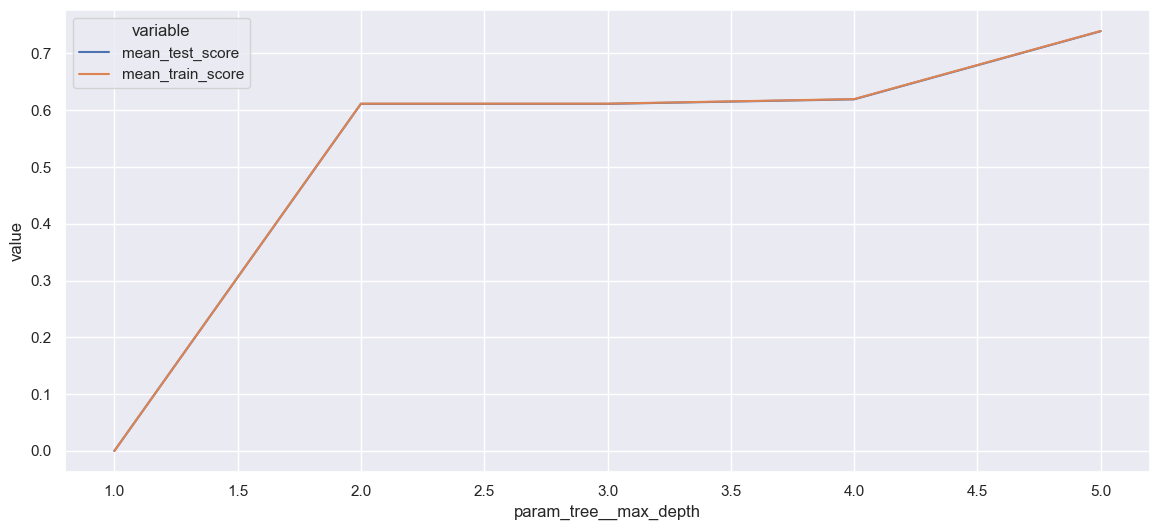

In [458]:
#melt dataframe into long format for seaborn to plot
search_long = search_results_2.melt(id_vars=["param_tree__max_depth"], value_vars=["mean_test_score", "mean_train_score"])

#seaborn plot
plt.figure(figsize=(14, 6))
g = sn.lineplot(data=search_long, x="param_tree__max_depth", y="value", hue="variable")

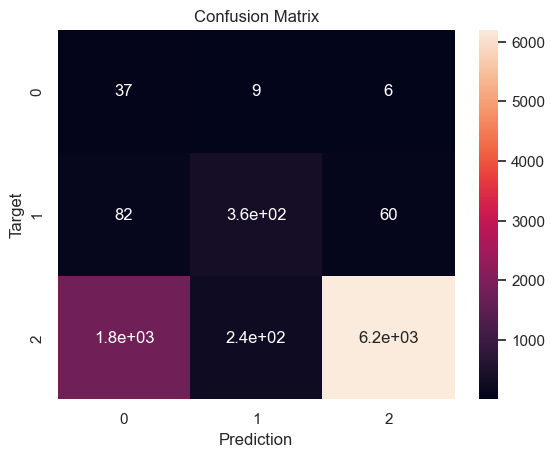

In [459]:
cf_DT = confusion_matrix(y_test, y_pred_search)
plt.figure()
sn.heatmap(cf_DT, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')
plt.show()

## ML modeling - Random Forests

In [460]:
from sklearn.ensemble import RandomForestClassifier

recall_0_scorer = make_scorer(recall_failure)

pipe = Pipeline(steps=[("scaler", StandardScaler()), 
                    ("tree", RandomForestClassifier())])

param_grid = {
    "tree__max_depth" : range(1, 5),
    "tree__n_estimators" : [100]
}

search = GridSearchCV(pipe, param_grid, return_train_score=True, scoring=recall_0_scorer, verbose=1)
search.fit(X_train_2, y_train_2)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

search_results_3 = pd.DataFrame(search.cv_results_)

y_pred_search = search.predict(X_test)

accuracy_DT= accuracy_score(y_test, y_pred_search)
print("Accuracy: {:.2f}%".format(accuracy_DT * 100))
recall_DT= recall_score(y_test, y_pred_search, average='weighted')
print("Recall: {:.2f}%".format(recall_DT * 100))
precision_DT=precision_score(y_test, y_pred_search, average='weighted')
print("Precision: {:.2f}%".format(precision_DT * 100))
f1_DT=f1_score(y_test, y_pred_search, average='weighted')
print("F1-Score: {:.2f}%".format(f1_DT * 100))

print(classification_report(y_test, y_pred_search))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameter (CV score=0.632):
{'tree__max_depth': 4, 'tree__n_estimators': 100}
Accuracy: 72.76%
Recall: 72.76%
Precision: 95.95%
F1-Score: 82.33%
              precision    recall  f1-score   support

           0       0.02      0.69      0.03        52
           1       0.60      0.69      0.64       503
           2       0.99      0.73      0.84      8233

    accuracy                           0.73      8788
   macro avg       0.53      0.71      0.51      8788
weighted avg       0.96      0.73      0.82      8788



In [461]:
balanced_accuracy_score(y_test, y_pred_search)

0.7053374254716185

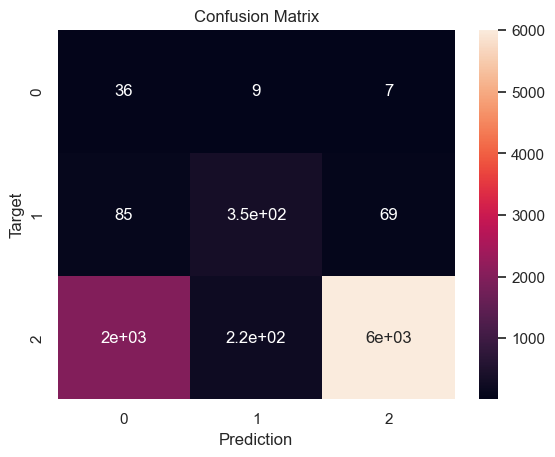

In [462]:
cf_RF = confusion_matrix(y_test, y_pred_search)
plt.figure()
sn.heatmap(cf_RF, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')
plt.show()

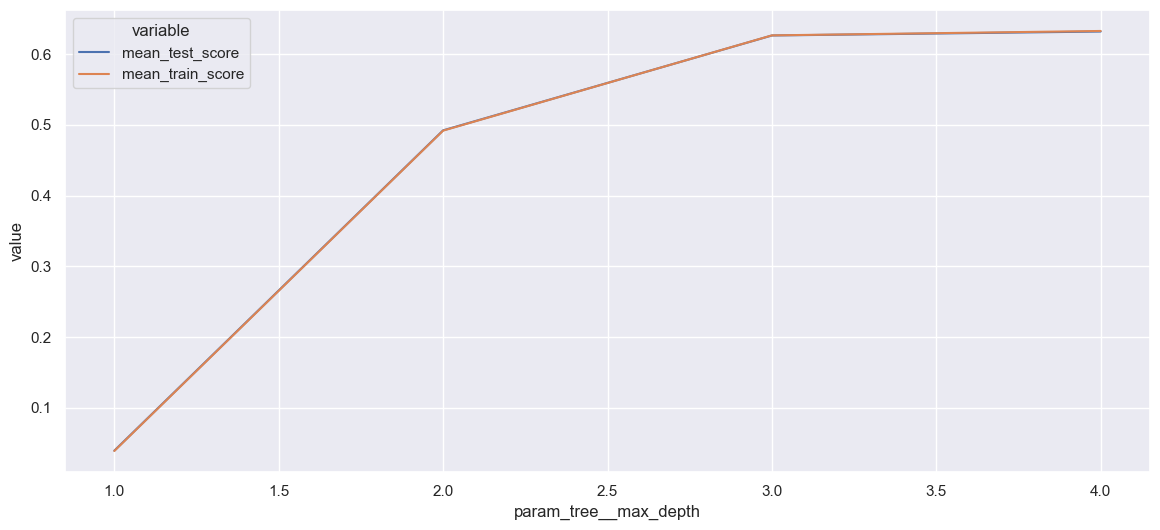

In [463]:
#melt dataframe into long format for seaborn to plot
search_long = search_results_3.melt(id_vars=["param_tree__max_depth"], value_vars=["mean_test_score", "mean_train_score"])

#seaborn plot
plt.figure(figsize=(14, 6))
g = sn.lineplot(data=search_long, x="param_tree__max_depth", y="value", hue="variable")

## ML modeling - ExtraTrees

In [464]:
recall_0_scorer = make_scorer(recall_failure)

pipe = Pipeline(steps=[("scaler", StandardScaler()), 
                    ("tree", ExtraTreesClassifier())])

param_grid = {
    "tree__max_depth" : range(1, 3),
    "tree__n_estimators" : [1000]
}

search = GridSearchCV(pipe, param_grid, return_train_score=True, scoring=recall_0_scorer, verbose=1)
search.fit(X_train_2, y_train_2)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

search_results_4 = pd.DataFrame(search.cv_results_)

y_pred_search = search.predict(X_test)

accuracy_DT= accuracy_score(y_test, y_pred_search)
print("Accuracy: {:.2f}%".format(accuracy_DT * 100))
recall_DT= recall_score(y_test, y_pred_search, average='weighted')
print("Recall: {:.2f}%".format(recall_DT * 100))
precision_DT=precision_score(y_test, y_pred_search, average='weighted')
print("Precision: {:.2f}%".format(precision_DT * 100))
f1_DT=f1_score(y_test, y_pred_search, average='weighted')
print("F1-Score: {:.2f}%".format(f1_DT * 100))

print(classification_report(y_test, y_pred_search))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameter (CV score=0.146):
{'tree__max_depth': 2, 'tree__n_estimators': 1000}
Accuracy: 93.43%
Recall: 93.43%
Precision: 94.94%
F1-Score: 94.14%
              precision    recall  f1-score   support

           0       0.04      0.13      0.07        52
           1       0.57      0.66      0.61       503
           2       0.98      0.96      0.97      8233

    accuracy                           0.93      8788
   macro avg       0.53      0.58      0.55      8788
weighted avg       0.95      0.93      0.94      8788



In [465]:
balanced_accuracy_score(y_test, y_pred_search)

0.584224608714678

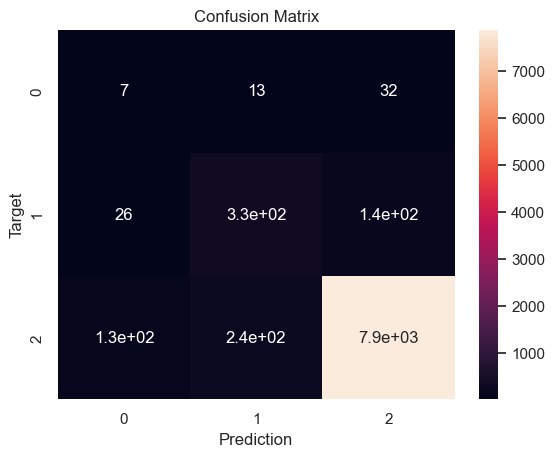

In [466]:
cf_ET = confusion_matrix(y_test, y_pred_search)
plt.figure()
sn.heatmap(cf_ET, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')
plt.show()

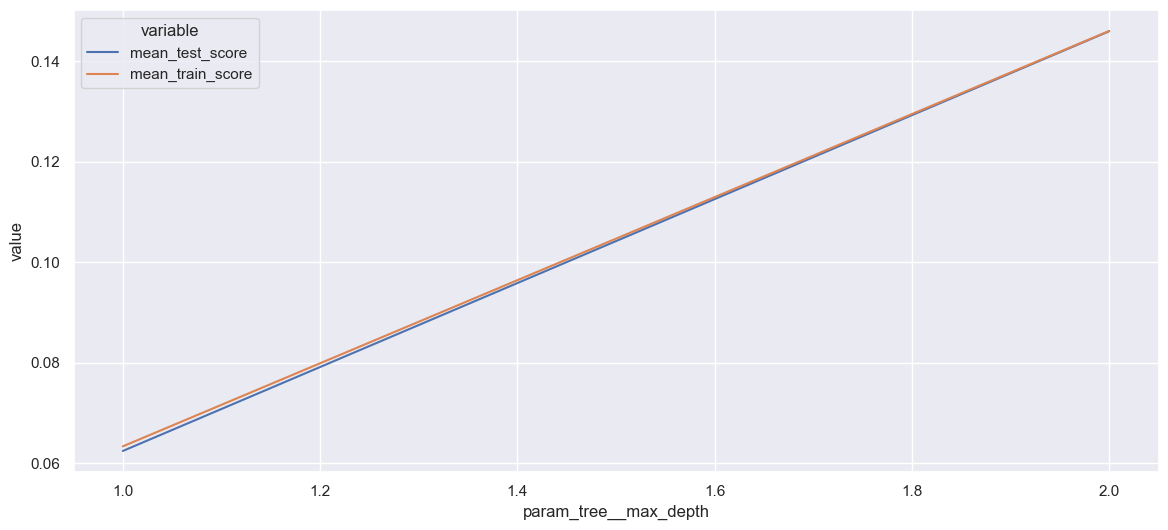

In [467]:
#melt dataframe into long format for seaborn to plot
search_long = search_results_4.melt(id_vars=["param_tree__max_depth"], value_vars=["mean_test_score", "mean_train_score"])

#seaborn plot
plt.figure(figsize=(14, 6))
g = sn.lineplot(data=search_long, x="param_tree__max_depth", y="value", hue="variable")

## Predictions on the RUL

In [468]:
df_1.head()

,TimeStamp,alarm,avg_el_usage,ex_el_usage,line_rate,line_rate_ma,status,status_30min,rul,rul_bins
1,2021-07-07 11:51:30,False,22.609907,31.674854,19.594288,19.594288,2,Working,6320.0,24hours+
2,2021-07-07 11:52:00,False,26.933184,20.201208,19.594288,19.594288,2,Working,6318.0,24hours+
3,2021-07-07 11:52:30,False,28.904484,39.827011,19.594288,19.594288,2,Working,6316.0,24hours+
4,2021-07-07 11:53:00,False,30.583208,25.773729,19.594288,19.594288,2,Working,6314.0,24hours+
5,2021-07-07 11:53:30,False,27.189575,27.254736,27.804878,20.962720,2,Working,6312.0,24hours+


In [469]:
X_rul = df_1[["alarm", "avg_el_usage", "ex_el_usage", "line_rate"]]
y_rul = df_1["rul_bins"]

X_train_rul, X_test_rul, y_train_rul, y_test_rul = train_test_split(X_rul, y_rul, stratify=y_rul)

In [470]:
smt = SMOTETomek(random_state=42)
X_train_rul_res, y_train_rul_res = smt.fit_resample(X_train_rul, y_train_rul)

In [471]:
pipe = Pipeline(steps=[("scaler", StandardScaler()), 
                    ("tree", DecisionTreeClassifier())])

param_grid = {
    "tree__max_depth" : range(1, 10)
}

search = GridSearchCV(pipe, param_grid, return_train_score=True, verbose=1)
search.fit(X_train_rul, y_train_rul)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

search_results_5 = pd.DataFrame(search.cv_results_)

y_pred_search = search.predict(X_test_rul)

accuracy_DT= accuracy_score(y_test_rul, y_pred_search)
print("Accuracy: {:.2f}%".format(accuracy_DT * 100))
recall_DT= recall_score(y_test_rul, y_pred_search, average='weighted')
print("Recall: {:.2f}%".format(recall_DT * 100))
precision_DT=precision_score(y_test_rul, y_pred_search, average='weighted')
print("Precision: {:.2f}%".format(precision_DT * 100))
f1_DT=f1_score(y_test_rul, y_pred_search, average='weighted')
print("F1-Score: {:.2f}%".format(f1_DT * 100))

print(classification_report(y_test_rul, y_pred_search))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameter (CV score=0.737):
{'tree__max_depth': 8}
Accuracy: 73.55%
Recall: 73.55%
Precision: 68.33%
F1-Score: 68.10%
              precision    recall  f1-score   support

     12hours       0.42      0.16      0.23      1171
     24hours       0.48      0.20      0.28      1437
    24hours+       0.77      0.96      0.85      7768
      30mins       0.78      0.55      0.64       161
      3hours       0.59      0.11      0.18       354
      60mins       0.33      0.06      0.11        94

    accuracy                           0.74     10985
   macro avg       0.56      0.34      0.38     10985
weighted avg       0.68      0.74      0.68     10985



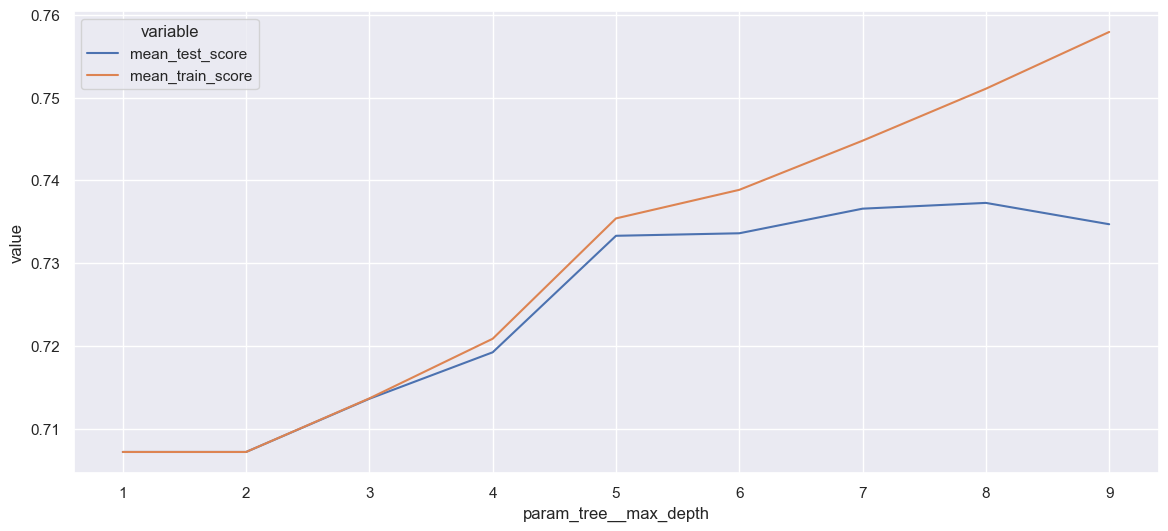

In [472]:
#melt dataframe into long format for seaborn to plot
search_long = search_results_5.melt(id_vars=["param_tree__max_depth"], value_vars=["mean_test_score", "mean_train_score"])

#seaborn plot
plt.figure(figsize=(14, 6))
g = sn.lineplot(data=search_long, x="param_tree__max_depth", y="value", hue="variable")

In [475]:
pipe = Pipeline(steps=[("scaler", StandardScaler()), 
                    ("tree", RandomForestClassifier())])

param_grid = {
    "tree__max_depth" : range(1, 10),
    "tree__n_estimators" : [100]
}


search = GridSearchCV(pipe, param_grid, return_train_score=True, verbose=1)
search.fit(X_train_rul, y_train_rul)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

search_results_6 = pd.DataFrame(search.cv_results_)

y_pred_search = search.predict(X_test_rul)

accuracy_DT= accuracy_score(y_test_rul, y_pred_search)
print("Accuracy: {:.2f}%".format(accuracy_DT * 100))
recall_DT= recall_score(y_test_rul, y_pred_search, average='weighted')
print("Recall: {:.2f}%".format(recall_DT * 100))
precision_DT=precision_score(y_test_rul, y_pred_search, average='weighted')
print("Precision: {:.2f}%".format(precision_DT * 100))
f1_DT=f1_score(y_test_rul, y_pred_search, average='weighted')
print("F1-Score: {:.2f}%".format(f1_DT * 100))

print(classification_report(y_test_rul, y_pred_search))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameter (CV score=0.743):
{'tree__max_depth': 9, 'tree__n_estimators': 100}
Accuracy: 74.20%
Recall: 74.20%
Precision: 69.93%
F1-Score: 67.86%
              precision    recall  f1-score   support

     12hours       0.51      0.11      0.18      1171
     24hours       0.53      0.20      0.29      1437
    24hours+       0.76      0.98      0.86      7768
      30mins       0.83      0.53      0.64       161
      3hours       0.65      0.12      0.20       354
      60mins       0.71      0.05      0.10        94

    accuracy                           0.74     10985
   macro avg       0.66      0.33      0.38     10985
weighted avg       0.70      0.74      0.68     10985



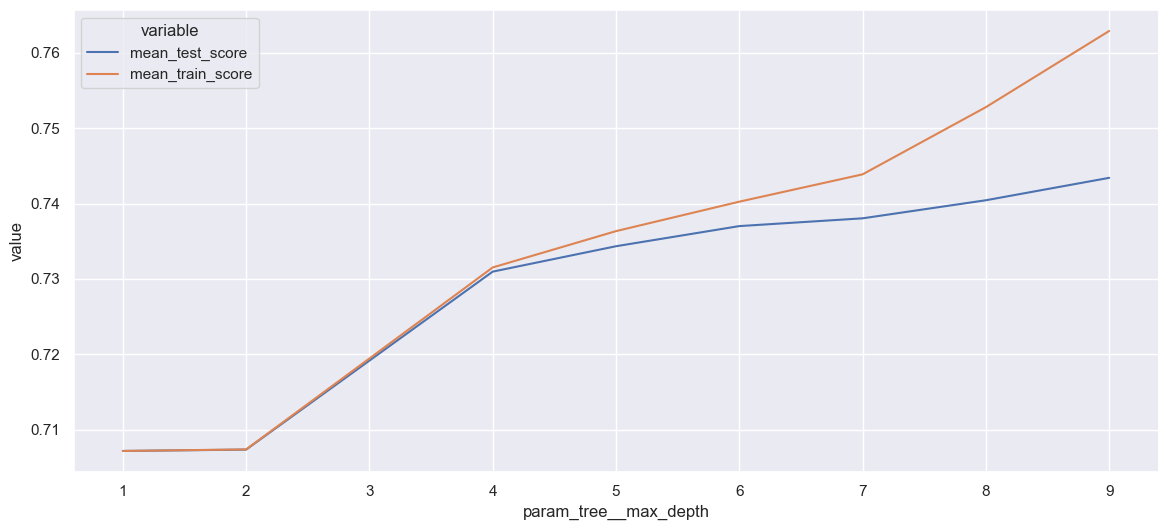

In [476]:
#melt dataframe into long format for seaborn to plot
search_long = search_results_6.melt(id_vars=["param_tree__max_depth"], value_vars=["mean_test_score", "mean_train_score"])

#seaborn plot
plt.figure(figsize=(14, 6))
g = sn.lineplot(data=search_long, x="param_tree__max_depth", y="value", hue="variable")

In [477]:
pipe = Pipeline(steps=[("scaler", StandardScaler()), 
                    ("tree", DecisionTreeClassifier())])

param_grid = {
    "tree__max_depth" : range(1, 10)
}

search = GridSearchCV(pipe, param_grid, return_train_score=True, verbose=1)
search.fit(X_train_rul_res, y_train_rul_res)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

search_results_7 = pd.DataFrame(search.cv_results_)

y_pred_search = search.predict(X_test_rul)

accuracy_DT= accuracy_score(y_test_rul, y_pred_search)
print("Accuracy: {:.2f}%".format(accuracy_DT * 100))
recall_DT= recall_score(y_test_rul, y_pred_search, average='weighted')
print("Recall: {:.2f}%".format(recall_DT * 100))
precision_DT=precision_score(y_test_rul, y_pred_search, average='weighted')
print("Precision: {:.2f}%".format(precision_DT * 100))
f1_DT=f1_score(y_test_rul, y_pred_search, average='weighted')
print("F1-Score: {:.2f}%".format(f1_DT * 100))

print(classification_report(y_test_rul, y_pred_search))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameter (CV score=0.528):
{'tree__max_depth': 9}
Accuracy: 60.07%
Recall: 60.07%
Precision: 71.76%
F1-Score: 64.33%
              precision    recall  f1-score   support

     12hours       0.27      0.32      0.29      1171
     24hours       0.32      0.43      0.37      1437
    24hours+       0.90      0.69      0.78      7768
      30mins       0.17      0.94      0.29       161
      3hours       0.15      0.22      0.18       354
      60mins       0.05      0.18      0.08        94

    accuracy                           0.60     10985
   macro avg       0.31      0.46      0.33     10985
weighted avg       0.72      0.60      0.64     10985



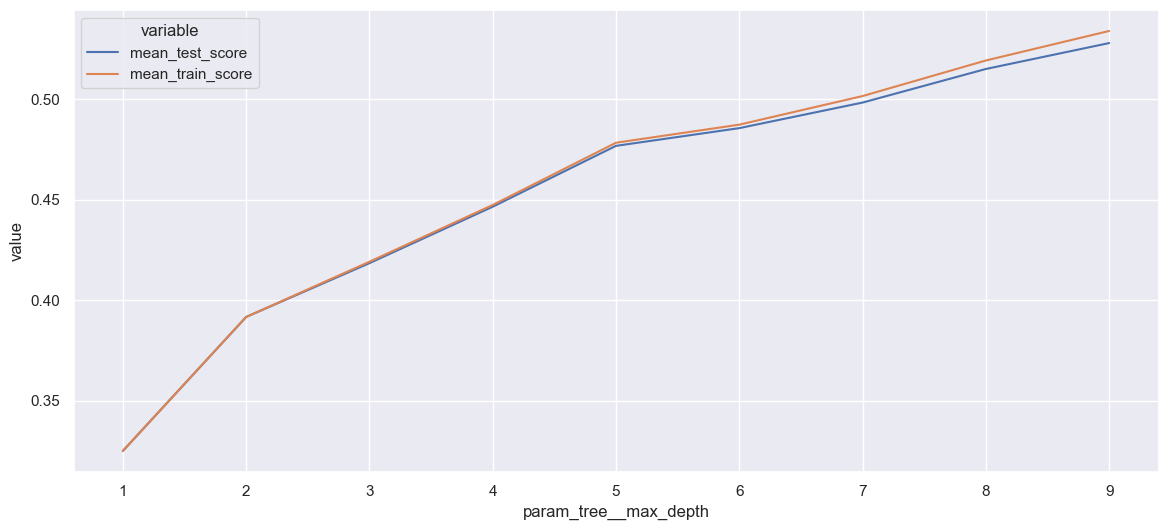

In [478]:
#melt dataframe into long format for seaborn to plot
search_long = search_results_7.melt(id_vars=["param_tree__max_depth"], value_vars=["mean_test_score", "mean_train_score"])

#seaborn plot
plt.figure(figsize=(14, 6))
g = sn.lineplot(data=search_long, x="param_tree__max_depth", y="value", hue="variable")

In [479]:
pipe = Pipeline(steps=[("scaler", StandardScaler()), 
                    ("tree", ExtraTreesClassifier())])

param_grid = {
    "tree__max_depth" : range(1, 3),
    "tree__n_estimators" : [1000]
}


search = GridSearchCV(pipe, param_grid, return_train_score=True, verbose=1)
search.fit(X_train_rul, y_train_rul)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

search_results_8 = pd.DataFrame(search.cv_results_)

y_pred_search = search.predict(X_test_rul)

accuracy_DT= accuracy_score(y_test_rul, y_pred_search)
print("Accuracy: {:.2f}%".format(accuracy_DT * 100))
recall_DT= recall_score(y_test_rul, y_pred_search, average='weighted')
print("Recall: {:.2f}%".format(recall_DT * 100))
precision_DT=precision_score(y_test_rul, y_pred_search, average='weighted')
print("Precision: {:.2f}%".format(precision_DT * 100))
f1_DT=f1_score(y_test_rul, y_pred_search, average='weighted')
print("F1-Score: {:.2f}%".format(f1_DT * 100))

print(classification_report(y_test_rul, y_pred_search))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameter (CV score=0.707):
{'tree__max_depth': 1, 'tree__n_estimators': 1000}
Accuracy: 70.71%
Recall: 70.71%
Precision: 50.01%
F1-Score: 58.58%
              precision    recall  f1-score   support

     12hours       0.00      0.00      0.00      1171
     24hours       0.00      0.00      0.00      1437
    24hours+       0.71      1.00      0.83      7768
      30mins       0.00      0.00      0.00       161
      3hours       0.00      0.00      0.00       354
      60mins       0.00      0.00      0.00        94

    accuracy                           0.71     10985
   macro avg       0.12      0.17      0.14     10985
weighted avg       0.50      0.71      0.59     10985



## Linear Regression Comparison

In [73]:
X = df_1[ 'line_rate_ma' ]
y = df_1[ 'status' ]

In [74]:
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, test_size = 0.3, random_state = 100 )

In [75]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(30755,)
(13182,)
(30755,)
(13182,)


In [76]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [77]:
lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 status   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                 1.086e+05
Date:                Mon, 31 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:35:17   Log-Likelihood:                 18865.
No. Observations:               30755   AIC:                        -3.773e+04
Df Residuals:                   30753   BIC:                        -3.771e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.0641      0.003    389.576   

In [78]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)
# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [79]:
y_pred.head()

24120    2.059496
28711    2.053231
10879    1.994403
19266    2.090045
11193    1.991027
dtype: float64

In [80]:
print ("RMSE: ",np.sqrt(mean_squared_error( y_test, y_pred)))
#R-squared value
print ("R-squared: ",r2_score( y_test, y_pred))

RMSE:  0.12633023446595107
R-squared:  0.7788434685781005


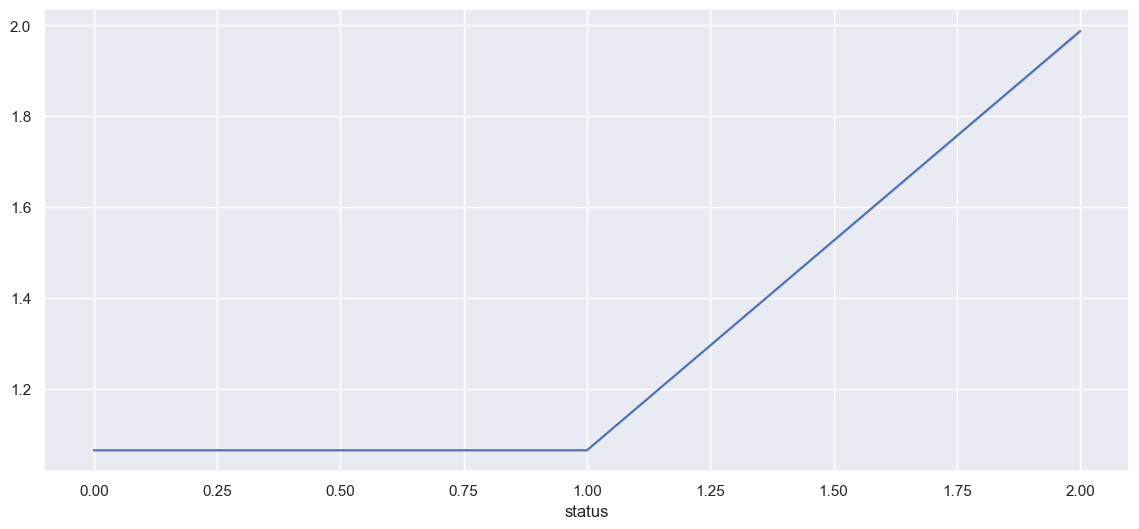

In [81]:
# Plot outputs
plt.figure(figsize=(14, 6))
g = sn.lineplot(data=X_test_sm, x=y_test, y=y_pred)

## Stacked LSTM Sequence-to-Sequence Modelling

In [173]:
df_2=df_1[['TimeStamp','line_rate_ma', 'rul']]
#label_encoder = LabelEncoder()
#df_2['rul']=label_encoder.fit_transform(df_2['rul'])

In [174]:
df_2

,TimeStamp,line_rate_ma,rul
1,2021-07-07 11:51:30,19.594288,6320.0
2,2021-07-07 11:52:00,19.594288,6318.0
3,2021-07-07 11:52:30,19.594288,6316.0
4,2021-07-07 11:53:00,19.594288,6314.0
5,2021-07-07 11:53:30,20.962720,6312.0
...,...,...,...
43933,2021-07-22 17:57:30,25.090081,130.0
43934,2021-07-22 17:58:00,25.093498,128.0
43935,2021-07-22 17:58:30,25.081680,126.0
43936,2021-07-22 17:59:00,25.049345,124.0


In [254]:
df_2['TimeStamp']=pd.to_datetime(df_2['TimeStamp'], infer_datetime_format=True)
df_3 = df_2.set_index(['TimeStamp'])
df_3

,line_rate_ma,rul
TimeStamp,,
2021-07-07 11:51:30,19.594288,6320.0
2021-07-07 11:52:00,19.594288,6318.0
2021-07-07 11:52:30,19.594288,6316.0
2021-07-07 11:53:00,19.594288,6314.0
2021-07-07 11:53:30,20.962720,6312.0
...,...,...
2021-07-22 17:57:30,25.090081,130.0
2021-07-22 17:58:00,25.093498,128.0
2021-07-22 17:58:30,25.081680,126.0


In [276]:
train_df,test_df = df_3[1:32952], df_3[32952:]

In [277]:
train = train_df
scalers={}

for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = test_df

for i in train_df.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

In [320]:
# split a univariate sequence into samples
def split_sequence(sequence, n_past, n_future):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        past_end = i + n_past
        future_end = past_end + n_future
        # check if we are beyond the sequence
        if future_end > len(sequence)-1:
            break
            # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:past_end], sequence[past_end:future_end:]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [392]:
n_past = 20
n_future = 10
n_features = 2

In [393]:
# Calling split_sequence function to split the arrays


X_train, y_train = split_sequence(train.values,n_past, n_future)

X_test, y_test = split_sequence(test.values,n_past, n_future)


In [394]:
# Reshaping arrays

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))

X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))


In [395]:
# E1D1
# n_features ==> no of features at each timestep in the data.

# Implementation of the Encoder Layer

encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(15, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)

encoder_states1 = encoder_outputs1[1:]

# Implementation of the Decoder Layer
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs1[0])

decoder_l1 = tf.keras.layers.LSTM(15, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_outputs1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l1)

model_e1d1 = tf.keras.models.Model(encoder_inputs,decoder_outputs1)

model_e1d1.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 20, 2)]      0           []                               
                                                                                                  
 lstm_46 (LSTM)                 [(None, 15),         1080        ['input_11[0][0]']               
                                 (None, 15),                                                      
                                 (None, 15)]                                                      
                                                                                                  
 repeat_vector_6 (RepeatVector)  (None, 10, 15)      0           ['lstm_46[0][0]']                
                                                                                            

In [396]:
# E2D2
# n_features ==> no of features at each timestep in the data.
#
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(15,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = tf.keras.layers.LSTM(15, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]
#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
#
decoder_l1 = tf.keras.layers.LSTM(15, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_l2 = tf.keras.layers.LSTM(15, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l2)
#
model_e2d2 = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
#
model_e2d2.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 20, 2)]      0           []                               
                                                                                                  
 lstm_48 (LSTM)                 [(None, 20, 15),     1080        ['input_12[0][0]']               
                                 (None, 15),                                                      
                                 (None, 15)]                                                      
                                                                                                  
 lstm_49 (LSTM)                 [(None, 15),         1860        ['lstm_48[0][0]']                
                                 (None, 15),                                                

In [397]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)

model_e1d1.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e1d1=model_e1d1.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),batch_size=32,verbose=0,callbacks=[reduce_lr])

model_e2d2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e2d2=model_e2d2.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),batch_size=32,verbose=0,callbacks=[reduce_lr])

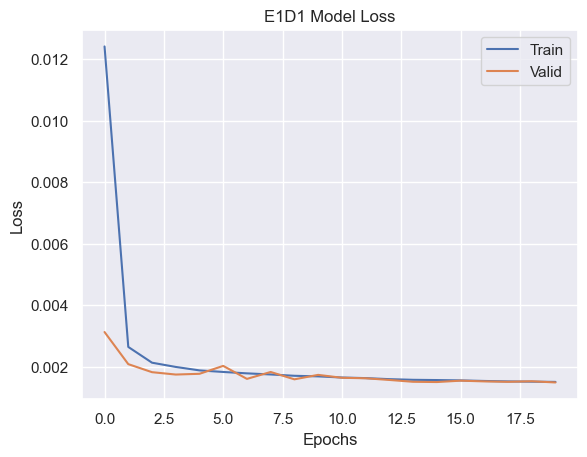

In [398]:
plt.plot(history_e1d1.history['loss'])
plt.plot(history_e1d1.history['val_loss'])
plt.title("E1D1 Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])
plt.show()

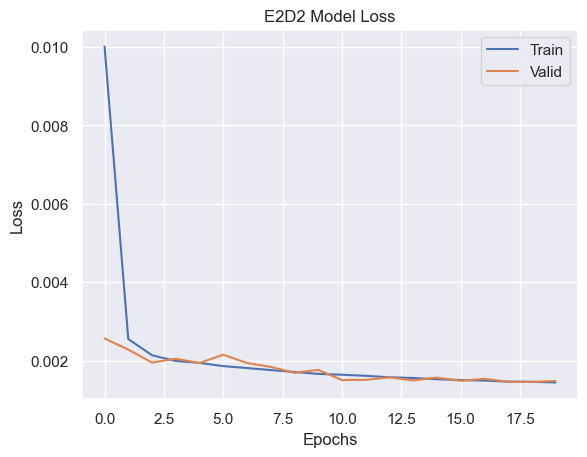

In [399]:
plt.plot(history_e2d2.history['loss'])
plt.plot(history_e2d2.history['val_loss'])
plt.title("E2D2 Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])
plt.show()

In [400]:
pred_e1d1=model_e1d1.predict(X_test)
pred_e2d2=model_e2d2.predict(X_test)

343/343 [==============================] - 2s 4ms/step


In [401]:
for index,i in enumerate(train_df.columns):
    scaler = scalers['scaler_'+i]
    #pred1_e1d1[:,:,index]=scaler.inverse_transform(pred1_e1d1[:,:,index])
    pred_e1d1[:,:,index]=scaler.inverse_transform(pred_e1d1[:,:,index])
    #pred1_e2d2[:,:,index]=scaler.inverse_transform(pred1_e2d2[:,:,index])
    pred_e2d2[:,:,index]=scaler.inverse_transform(pred_e2d2[:,:,index])
    y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    y_test[:,:,index]=scaler.inverse_transform(y_test[:,:,index])

In [402]:
from sklearn.metrics import mean_absolute_error
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,6):
        print("Day ",j,":")
        print("MAE-E1D1 : ",mean_absolute_error(y_test[:,j-1,index],pred_e1d1[:,j-1,index]),end=", ")
        print("MAE-E2D2 : ",mean_absolute_error(y_test[:,j-1,index],pred_e2d2[:,j-1,index]))
        print()

line_rate_ma
Day  1 :
MAE-E1D1 :  0.07539231628583931, MAE-E2D2 :  0.09281813988594782

Day  2 :
MAE-E1D1 :  0.1668719001073916, MAE-E2D2 :  0.15007841692530668

Day  3 :
MAE-E1D1 :  0.25732662982919474, MAE-E2D2 :  0.1958711457358063

Day  4 :
MAE-E1D1 :  0.3089029169618007, MAE-E2D2 :  0.25961477705969654

Day  5 :
MAE-E1D1 :  0.37162977098409217, MAE-E2D2 :  0.3397069970830846

rul
Day  1 :
MAE-E1D1 :  42.75015017498252, MAE-E2D2 :  49.1189901999881

Day  2 :
MAE-E1D1 :  34.94746678786319, MAE-E2D2 :  45.732281876072825

Day  3 :
MAE-E1D1 :  32.852324100348135, MAE-E2D2 :  42.30469220401162

Day  4 :
MAE-E1D1 :  39.49952395344259, MAE-E2D2 :  43.14980593694502

Day  5 :
MAE-E1D1 :  42.45278690687765, MAE-E2D2 :  48.66247202156886

